# Exploring and Analyzing Text Data Assignment 

In [1]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [4]:
PATH = '/content/drive/MyDrive/News_Articles/'

DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [5]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [6]:
def extract_stats(x):
  #Number of sentences
  sent = sent_tokenize(x)
  num_sents = len(sent)

  #Number of tokens
  tokens = word_tokenize(x)
  num_tokens = len(tokens)

  #Number of words
  words = [token.lower() for token in tokens 
          if token.lower() not in stopwords.words('english')
          if token not in string.punctuation]
  num_words = len(words)

  #Number of unique words
  vocab = len(set(words))

  #Number of unique named entities
  numerics = ['DATE', 'TIME', 'MONEY', 'QUANTITY', 'ORDINAL', 'CARDINAL']
  spacy_doc = nlp(x)
  entities = [entity.text for entity in spacy_doc.ents if entity.label_ not in numerics]
  num_entities = len(set(entities))

  #average sentence length
  avg_sent_length = num_words / num_sents

  #average word length
  avg_word_length = sum([len(word) for word in words]) / num_words
                        
  #lexical diversity
  lex_div = vocab / num_words

  stats = [num_sents, num_tokens, num_words, vocab, num_entities, avg_sent_length, avg_word_length, lex_div]
  return stats

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [7]:
stats = []

for i, doc in enumerate(docs):
  doc_stats = extract_stats(doc)
  doc_stats = [f'Article_{i}'] + doc_stats
  stats.append(doc_stats)

In [8]:
doc_df = pd.DataFrame(stats)
doc_df.columns = ['Document', 'Sentences', 'Tokens', 'Words', 'Vocabulary', 'Entities', 
                  'Avg. Sent Length', 'Avg. Word Length', 'Lexical Diversity']

doc_df.head()

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
0,Article_0,7,241,128,95,12,18.285714,5.273438,0.742188
1,Article_1,15,685,380,269,31,25.333333,6.297368,0.707895
2,Article_2,13,555,281,181,11,21.615385,5.594306,0.644128
3,Article_3,29,1029,545,338,48,18.793103,5.825688,0.620183
4,Article_4,68,1999,1055,607,78,15.514706,6.376303,0.575355


### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [9]:
doc_df.describe()

,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,30.500000,944.785714,513.785714,317.642857,35.357143,18.080184,5.970082,0.649588
std,21.302763,558.518532,310.149388,168.421453,23.656540,3.875462,0.500651,0.064843
min,7.000000,241.000000,128.000000,95.000000,10.000000,12.916667,5.172414,0.500477
25%,13.000000,551.250000,287.000000,186.750000,15.750000,15.245507,5.648240,0.621904
50%,29.000000,931.000000,501.500000,314.000000,29.500000,18.205357,5.934083,0.644738
75%,43.250000,1253.000000,670.750000,429.000000,45.000000,20.995690,6.356570,0.698134
max,68.000000,1999.000000,1055.000000,607.000000,80.000000,25.333333,6.873171,0.742188


### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

Text(0.5, 1.0, 'Term Frequency Distribution \n')

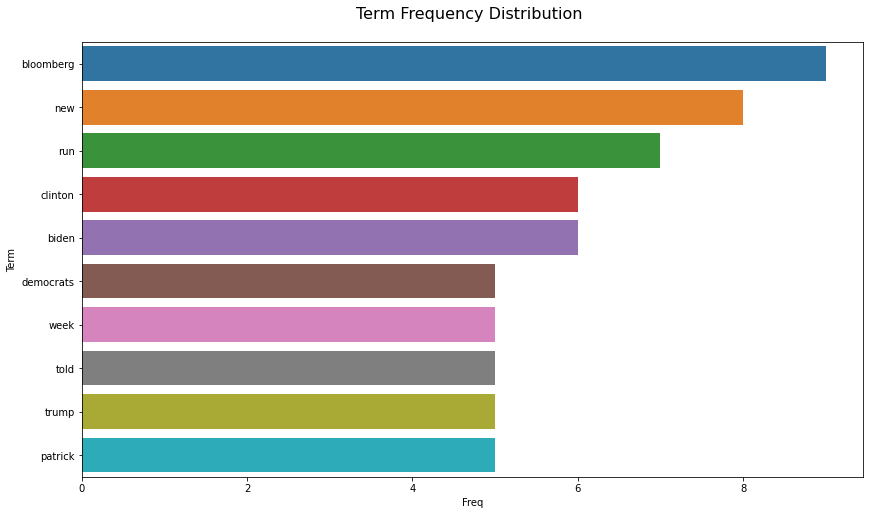

In [10]:
doc = docs[3]

cleaned = [token.lower() for token in word_tokenize(doc) 
            if token.lower() not in stopwords.words('english') 
            if token.isalpha()]

fdist = FreqDist(cleaned)
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Term', 'Freq']
ordered = fdist_df.sort_values('Freq', ascending=False)
filtered = ordered[ordered['Freq'] > 1]

plt.figure(figsize=(14,8))
sns.barplot(data=filtered.head(10), x='Freq', y='Term')
plt.title('Term Frequency Distribution \n', fontsize=16)

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [11]:
def wordcloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800, 
                    stopwords=STOPWORDS, 
                    colormap=colormap, 
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

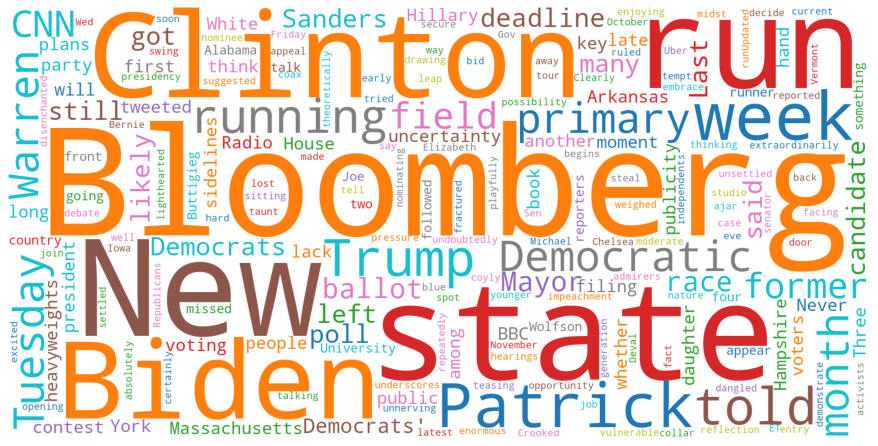

In [12]:
wordcloud(doc)

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

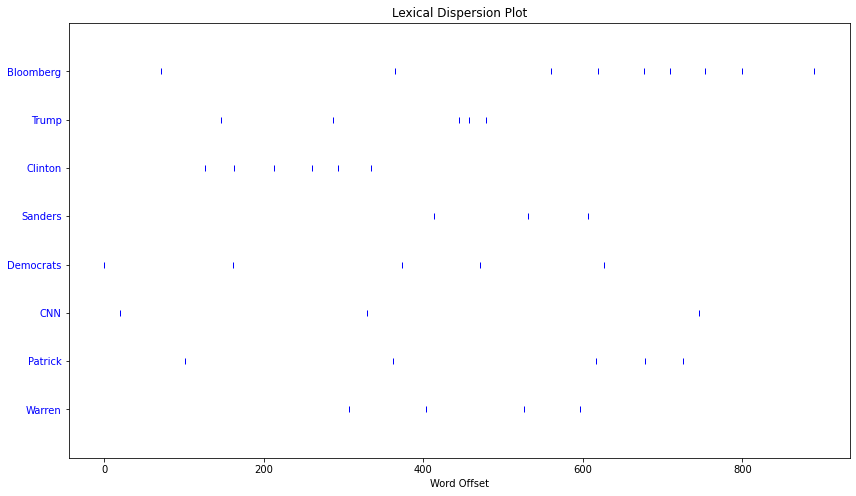

In [13]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

tokenized = word_tokenize(doc)

terms = ['Bloomberg', 'Trump', 'Clinton', 'Sanders', 'Democrats', 'CNN', 'Patrick', 'Warren']

Text(tokenized).dispersion_plot(terms)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [14]:
from yellowbrick.text.postag import PosTagVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
tokens = word_tokenize(doc) 
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer() 
visualizer.transform(tagged)

print(' '.join((visualizer.colorize(token, color)
                for color, token in visualizer.tagged)))
print('\n')

Democrats ' 2020 uncertainty has heavyweights thinking about a runUpdated 12:48 AM ET , Wed November 13 , 2019 ( CNN ) - Three Democratic heavyweights this week have dangled the possibility of a 2020 White House run , a reflection of the extraordinarily unsettled nature of the Democratic field only a few months before voting begins.On the eve of the first public impeachment hearings , former New York Mayor Michael Bloomberg made a run to Arkansas on Tuesday to secure his spot on that state 's Democratic primary ballot , should he decide to run . Former Massachusetts Gov . Deval Patrick weighed a late entry to the race while facing down Friday 's filing deadline in the key state of New Hampshire . And Hillary Clinton coyly suggested , once again , that she could leap from the sidelines.Clearly enjoying the opportunity to taunt Trump at this vulnerable moment in his presidency -- and undoubtedly unnerving some current 2020 Democrats -- Clinton told BBC Radio that she was not running for 